# <font color=gree> Ecommerce Customer

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
customers = pd.read_csv('Ecommerce Customers.csv')

In [6]:
customers.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [8]:
customers.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


In [10]:
customers.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

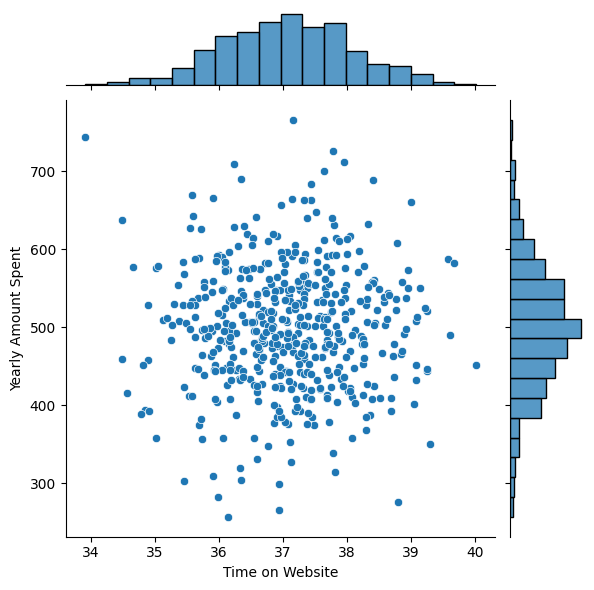

In [14]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

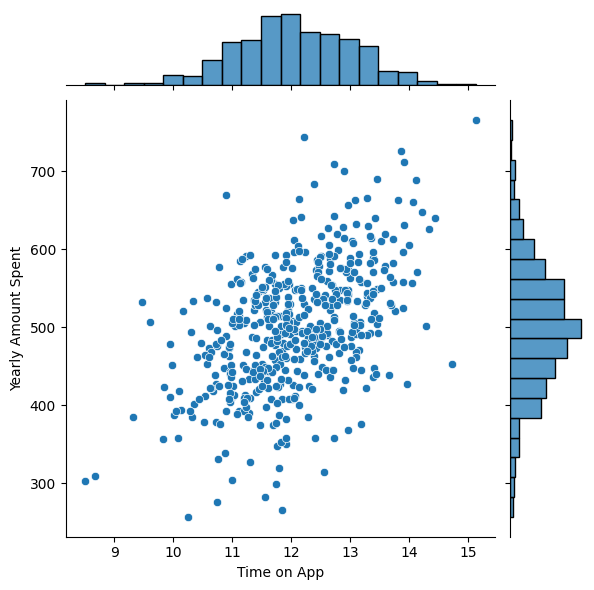

In [15]:
sns.jointplot(data=customers, x='Time on App', y='Yearly Amount Spent')

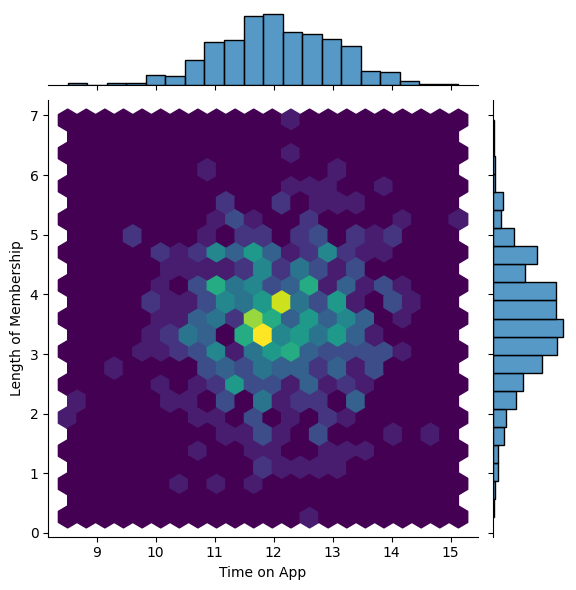

In [21]:
#### Compare Time on App and Length of Membership

sns.jointplot(data=customers, x='Time on App', y='Length of Membership',kind='hex',cmap='viridis')

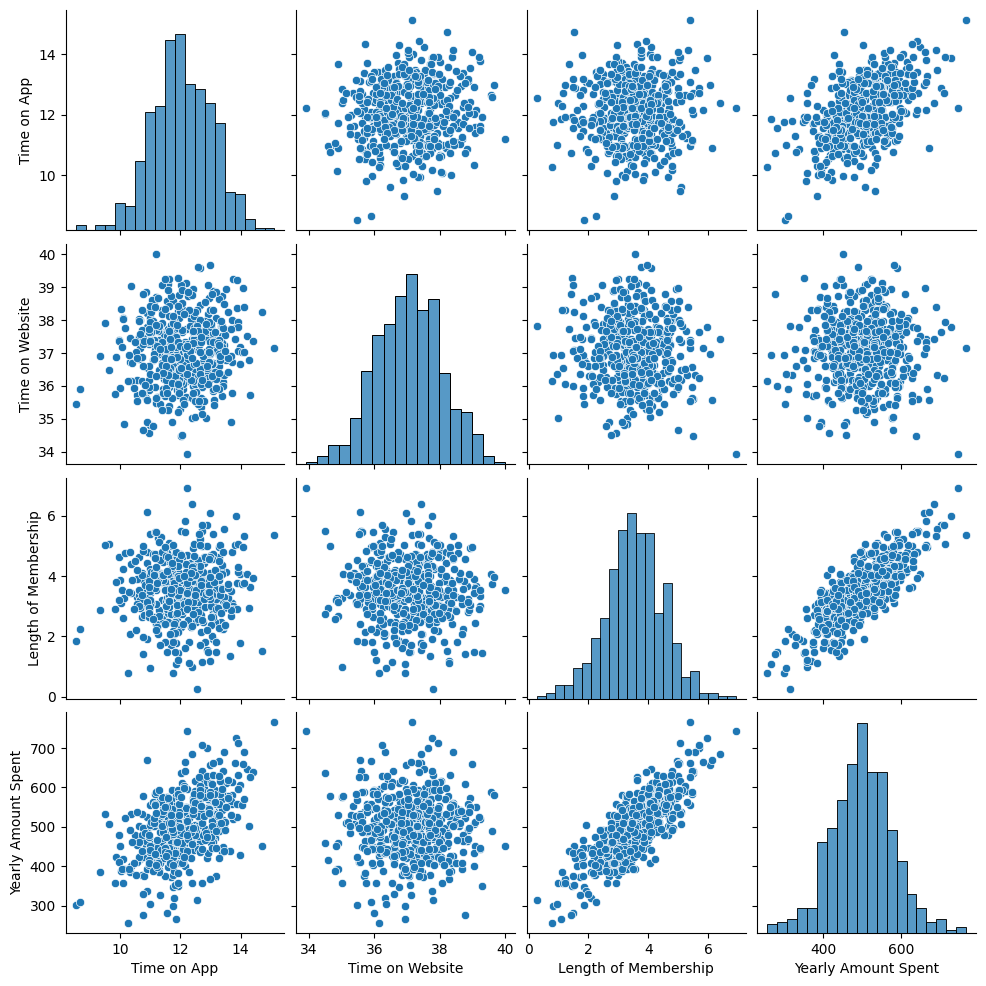

In [22]:
sns.pairplot(customers)

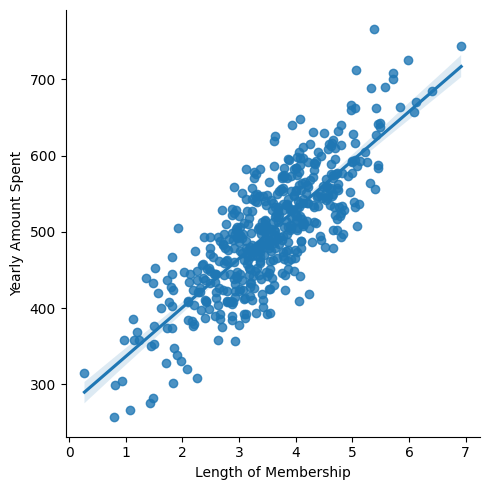

In [24]:
### Create a linear model plot of Yearly Amount Spent vs Length of Membership

sns.lmplot(data=customers, y='Yearly Amount Spent', x='Length of Membership')

### <font color=gree> Training and Testing Data

In [25]:
customers.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [26]:
y = customers['Yearly Amount Spent']

In [28]:
X = customers[['Time on App','Time on Website', 'Length of Membership']]

In [30]:
import sklearn

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### <font color=blue> Training the Model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
print(lm.coef_)

[36.73506185  1.06976162 62.09959533]


### <font color=yellow> Predicting Test Data

In [43]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

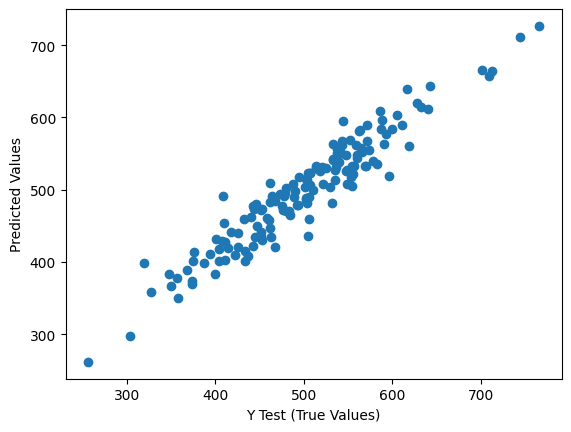

In [44]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

### <font color=orange> Evaluating the Model

In [45]:
from sklearn import metrics

In [48]:
print('MAE', metrics.mean_absolute_error(y_test,predictions))
print('MSE', metrics.mean_squared_error(y_test,predictions))
print('RSME', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 20.68662778076648
MSE 678.3961717781167
RSME 26.04603946434307


In [50]:
metrics.explained_variance_score(y_test,predictions)

0.9068561842704586

### <font color=green> Residuals

C:\Users\HP\AppData\Local\Temp\ipykernel_9756\5727784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins=50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

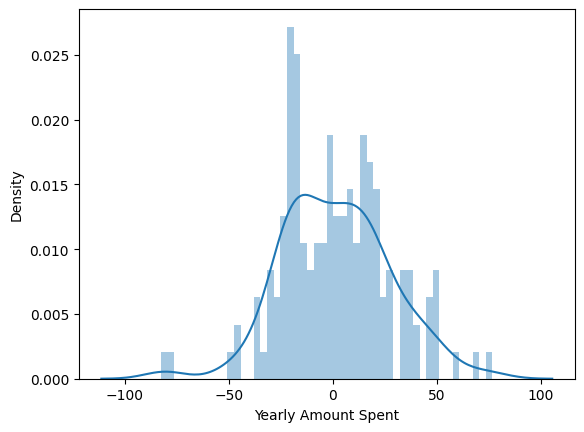

In [51]:
sns.distplot((y_test-predictions), bins=50)

In [53]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
Time on App,36.735062
Time on Website,1.069762
Length of Membership,62.099595
